In [2]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-05-19 23:59:14.325495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:59:14.364361: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-05-19 23:59:15.235268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 23:59:15.249013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 23:59:15.249132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-05-19 23:59:15.252318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:59:15.253014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 23:59:15.253121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 23:59:15.253192: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [4]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle

# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.models import load_model


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from save_model_info import save_training_info


# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


from plots import plot_confusion_matrix, plot_accuracy, plot_loss, plot_accuracy_k_fold, plot_loss_k_fold, plot_average_accuracy_k_fold, plot_average_loss_k_fold

In [5]:
%store -r experiment_ID
print(experiment_ID)
%store -r save_dir
print(save_dir)
# %store -r model_version
# print(model_version)

%store -r f1_score_val_list
%store -r f1_score_mean

%store -r num_folds
%store -r conf_matrices
%store -r epochs
%store -r output_dir
%store -r data_file
%store -r no_of_labels
# %store -r epochs

Exp_4.3.2-BPSVMt-one-video
/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/Experiment_4.3.1 - BPNNt_output


### Plot the Mean CM

In [ ]:
#plot the mean confusion matrix
mean_cm = np.mean(conf_matrices, axis=0)
train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
plt.figure(figsize=(7, 5))
sns.heatmap(mean_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=8)
plt.xlabel('Predicted Labels', fontsize=8)
plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
plt.ylabel('True Labels', fontsize=8)
plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
plt.show()

# skip the numbers

In [ ]:
len(conf_matrices)

In [ ]:
f1_score_mean

In [ ]:
# for i, train_acc in enumerate(train_acc_all):
#     print(f"Fold {i}: {len(train_acc)}")

In [ ]:
# dir_path = save_dir
# history_file = os.path.join(dir_path, 'history.pkl')
# train_images_file = os.path.join(dir_path, 'train_images.pkl')
# train_labels_file = os.path.join(dir_path, 'train_labels.pkl')
# val_images_file = os.path.join(dir_path, 'val_images.pkl')
# val_labels_file = os.path.join(dir_path, 'val_labels.pkl')

In [ ]:
# # Load the history object from the pickle file
# with open(os.path.join(dir_path,'history.pkl'), 'rb') as f:
#     history = pickle.load(f)
    
# with open(os.path.join(dir_path,'train_images.pkl'), 'rb') as f:
#     train_images = pickle.load(f)
    
# with open(os.path.join(dir_path,'train_labels.pkl'), 'rb') as f:
#     train_labels = pickle.load(f)
    
# with open(os.path.join(dir_path,'val_images.pkl'), 'rb') as f:
#     val_images = pickle.load(f)
    
# with open(os.path.join(dir_path,'val_labels.pkl'), 'rb') as f:
#     val_labels = pickle.load(f)

### Set paths for saving results

In [ ]:
model_acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"+str(output_dir)+"/accuracy"
model_loss_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"+str(output_dir)+"/loss"
model_average_loss_dir = model_loss_dir
model_average_acc_dir = model_acc_dir

### Load current or previous data for plotting

In [ ]:
num_folds = 5

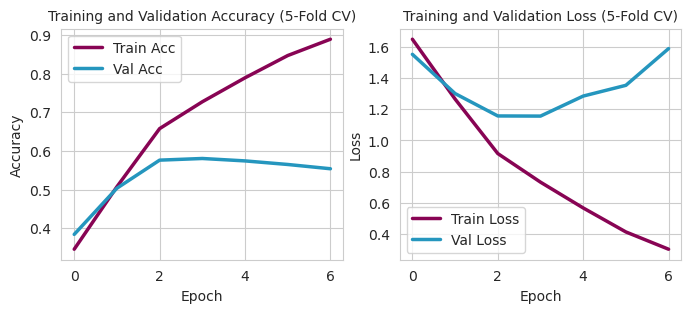

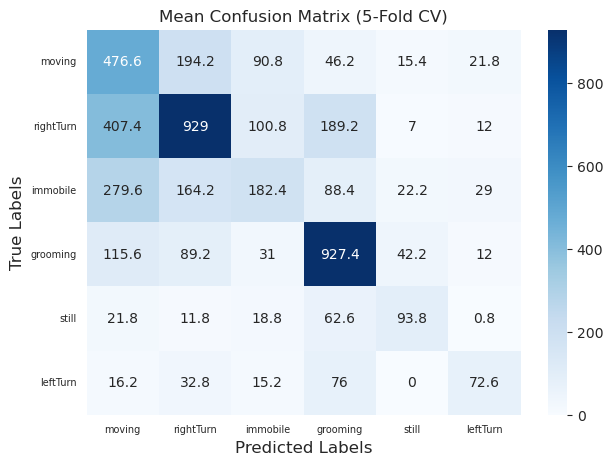

In [9]:
load_existing_data = True

if load_existing_data == True:
    
    model_acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/Experiment_4 - BPNNt_output/results"
    
    
    with open(os.path.join(model_acc_dir,'val_loss_avg.pkl'), 'rb') as f:
        val_loss_avg = pickle.load(f)

    with open(os.path.join(model_acc_dir,'val_acc_avg.pkl'), 'rb') as f:
        val_acc_avg = pickle.load(f)

    with open(os.path.join(model_acc_dir,'train_loss_avg.pkl'), 'rb') as f:
        train_loss_avg = pickle.load(f)

    with open(os.path.join(model_acc_dir,'train_acc_avg.pkl'), 'rb') as f:
        train_acc_avg = pickle.load(f)
        
    with open(os.path.join(model_acc_dir,'train_acc_avg.pkl'), 'rb') as f:
        train_acc_avg = pickle.load(f)
    
    with open(os.path.join(model_acc_dir,'conf_matrices.pkl'), 'rb') as f:
        conf_matrices = pickle.load(f)
            
    with open(os.path.join(model_acc_dir,'train_labels_names.pkl'), 'rb') as f:
        train_labels_names = pickle.load(f)
    

#     with open(os.path.join(model_acc_dir,'cm_avg.pkl'), 'rb') as f:
#         cm_avg = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'losses.pkl'), 'rb') as f:
#         losses = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_accuracies.pkl'), 'rb') as f:
#         shuffled_accuracies = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_cm_avg.pkl'), 'rb') as f:
#         shuffled_cm_avg = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'shuffled_losses.pkl'), 'rb') as f:
#         shuffled_losses = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'train_labels_names.pkl'), 'rb') as f:
#         train_labels_names = pickle.load(f)
    
        

    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')

    min_length = len(val_loss_avg)

    # Plot the averaged results - subplot 1
    sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
    sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

    axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    axs[0].set_xlabel('Epoch', fontsize=10)
    axs[0].set_ylabel('Accuracy', fontsize=10)
    axs[0].legend(loc='upper left')

    # Plot the averaged results - subplot 2
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
    sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

    axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    axs[1].set_xlabel('Epoch', fontsize=10)
    axs[1].set_ylabel('Loss', fontsize=10)
    axs[1].legend(loc='lower left')
    
    
    experiment_ID = "3_output"
    

    plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    
    #plot the mean confusion matrix
    mean_cm = np.mean(conf_matrices, axis=0)
    train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    plt.figure(figsize=(7, 5))
    sns.heatmap(mean_cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
    plt.ylabel('True Labels', fontsize=12)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
    plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
    plt.show()
    
    # Plotting
#     n_splits = 5

#     plt.figure(figsize=(12, 10))

#     # Accuracy and Shuffled Accuracy
#     plt.subplot(2, 2, 1)
#     sns.lineplot(x=np.arange(1, n_splits+1), y=accuracies, marker='o', label='Accuracy')
#     sns.lineplot(x=np.arange(1, n_splits+1), y=shuffled_accuracies, marker='o', label='Chance Accuracy')
#     plt.xlabel("Fold", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title("Accuracy per Fold (5-Fold CV) ")
#     plt.legend()

#     # Loss and Shuffled Loss
#     plt.subplot(2, 2, 2)
#     sns.lineplot(x=np.arange(1, n_splits+1), y=losses, marker='o', label='Loss')
#     sns.lineplot(x=np.arange(1, n_splits+1), y=shuffled_losses, marker='o', label='Chance Loss')
#     plt.xlabel("Fold", fontsize=12)
#     plt.ylabel("Loss", fontsize=12)
#     plt.title("Loss per Fold (5-Fold CV)")
#     plt.legend()

#     # Average Confusion Matrix for Regular Labels
#     plt.subplot(2, 2, 3)
#     train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
#     sns.heatmap(np.mean(cm_avg, axis=0), annot=True, cmap='Blues', fmt='g')
#     plt.title('Average Confusion Matrix Per Fold (5-Fold CV)')
#     plt.xlabel('Predicted Labels', fontsize=12)
#     plt.xticks(np.arange(len(label_names)) + 0.5, label_names, ha='center', fontsize=8)
#     plt.ylabel('True Labels', fontsize=12)
#     plt.yticks(np.arange(len(label_names)) + 0.5, label_names, rotation=0, fontsize=8)

#     # Average Confusion Matrix for Shuffled Labels
#     plt.subplot(2, 2, 4)
#     sns.heatmap(np.mean(shuffled_cm_avg, axis=0), annot=True, cmap='Blues', fmt='g')
#     plt.title('Average Confusion Matrix (5-Fold CV - Shuffled Labels)')
#     plt.xlabel('Predicted Labels', fontsize=12)
#     plt.xticks(np.arange(len(label_names)) + 0.5, label_names, ha='center', fontsize=8)
#     plt.ylabel('True Labels', fontsize=12)
#     plt.yticks(np.arange(len(label_names)) + 0.5, label_names, rotation=0, fontsize=8)


#     save_SVM_plots = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/4-BPSVM_output/"
#     plt.savefig(save_SVM_plots+"/accuracy_loss_cm_regular_shuffled_labels.svg", dpi=600, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show()


#     fig, ax = plt.subplots(figsize=(4, 3))
#     sns.set_style('whitegrid')
#     sns.set_palette('husl')
    
#     min_length = len(val_loss_avg)
    
#     # Plot the averaged results
#     sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454')
#     sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be')
    
#     plt.title('Training and Validation Accuracy (5-Fold CV)', fontsize=8)
#     plt.xlabel('Epoch', fontsize=6)
#     plt.ylabel('Accuracy', fontsize=6)
#     plt.legend(loc='lower right')
#     plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()
    
#     # Plot the averaged results
#     sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454')
#     sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be')
    
#     plt.title('Training and Validation Loss (5-Fold CV)', fontsize=8)
#     plt.xlabel('Epoch', fontsize=6)
#     plt.ylabel('Loss', fontsize=6)
#     plt.legend(loc='lower right')
#     plt.savefig(model_loss_dir+"/"+"training-validation-loss_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()
    
    
    
    
else:
    
    
    %store -r train_loss_all
    %store -r val_loss_all
    %store -r train_acc_all
    %store -r val_acc_all
    
    fig = plt.figure(figsize=(4, 3)) 
    sns.set_style('whitegrid')
    sns.set_palette('husl')
    
#     # Find the minimum length of the train and validation accuracy lists
    min_length = min([len(train_acc_all[i]) for i in range(num_folds)] + [len(val_acc_all[i]) for i in range(num_folds)])
    
    # Create arrays to hold the averaged results
    train_acc_avg = np.zeros(min_length)
    val_acc_avg = np.zeros(min_length)
    
    
    # Average the results across all folds
    for i in range(num_folds):
        train_acc_fold = np.array(train_acc_all[i][:min_length])
        val_acc_fold = np.array(val_acc_all[i][:min_length])
        train_acc_avg += train_acc_fold
        val_acc_avg += val_acc_fold
        
        # # Plot individual fold results
        # sns.lineplot(x=range(min_length), y=train_acc_fold, label=f'Train Acc Fold {i+1}', alpha=0.7)
        # sns.lineplot(x=range(min_length), y=val_acc_fold, label=f'Val Acc Fold {i+1}', alpha=0.7)
        
    train_acc_avg /= num_folds
    val_acc_avg /= num_folds
    
    # Plot the averaged results
    sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454')
    sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be')
    
    plt.title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Accuracy', fontsize=8)
    plt.legend(loc='upper left')
    plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    
    #### loss ####
    
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')
    
    
    # Create arrays to hold the averaged results
    train_loss_avg = np.zeros(min_length)
    val_loss_avg = np.zeros(min_length)
    
    # Average the results across all folds
    for i in range(num_folds):
        train_loss_fold = np.array(train_loss_all[i][:min_length])
        val_loss_fold = np.array(val_loss_all[i][:min_length])
        train_loss_avg += train_loss_fold
        val_loss_avg += val_loss_fold
        
        # # Plot individual fold results
        # sns.lineplot(x=range(min_length), y=train_loss_fold, label=f'Train Loss Fold {i+1}', alpha=0.7)
        # sns.lineplot(x=range(min_length), y=val_loss_fold, label=f'Val Loss Fold {i+1}', alpha=0.7)
    
    train_loss_avg /= num_folds
    val_loss_avg /= num_folds
    
    # Plot the averaged results
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454')
    sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be')
    
    
    plt.title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Loss', fontsize=8)
    plt.legend(loc='upper left')
    plt.savefig(model_loss_dir+"/"+"training-validation-loss_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    # return train_acc_avg, val_acc_avg
    
#     # Find the minimum length of the train and validation accuracy lists
#     min_length_1 = min([len(train_acc_all[i]) for i in range(num_folds)] + [len(val_acc_all[i]) for i in range(num_folds)])
#     min_length_2 = min([len(train_loss_all[i]) for i in range(num_folds)] + [len(val_loss_all[i]) for i in range(num_folds)])
    
#     fig, axs = plt.subplots(1, 2, figsize=(8, 3))
#     sns.set_style('whitegrid')
#     sns.set_palette('husl')

#     min_length = min([min_length_1] + [min_length_2])
    
#     print(train_acc_avg)
#     print(val_acc_avg)
#     print(train_loss_avg)
#     print(val_loss_avg)

#     # Plot the averaged results - subplot 1
#     sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
#     sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

#     axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=8)
#     axs[0].set_xlabel('Epoch', fontsize=6)
#     axs[0].set_ylabel('Accuracy', fontsize=6)
#     axs[0].legend(loc='lower right')

#     # Plot the averaged results - subplot 2
#     sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
#     sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

#     axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=8)
#     axs[1].set_xlabel('Epoch', fontsize=6)
#     axs[1].set_ylabel('Loss', fontsize=6)
#     axs[1].legend(loc='lower right')

#     plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()

In [ ]:
# train_acc_avg, val_acc_avg = plot_accuracy_k_fold(experiment_ID, model_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs, min_length=min_length)
# train_loss_avg, val_loss_avg = plot_loss_k_fold(experiment_ID, model_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs, min_length=min_length)

# mean_train_acc, mean_val_acc = plot_average_accuracy_k_fold(experiment_ID, model_average_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs)
# mean_train_loss, mean_val_loss = plot_average_loss_k_fold(experiment_ID, model_average_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs)

# f1_score_val = plot_confusion_matrix(experiment_ID, no_of_behaviors, train_labels, val_labels, train_images, val_images, model_cm_dir, model_path, model_version)
# plot_loss(experiment_ID, history, model_loss_dir)
# plot_accuracy(experiment_ID, history, model_acc_dir)
# no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']

In [ ]:
train_acc_avg

In [ ]:
val_acc_avg

### Save averages from plotting

In [ ]:
# create pickles directory
dir_name_pickles = os.path.join(output_dir, 'results')
if not os.path.exists(dir_name_pickles):
    os.mkdir(dir_name_pickles)

# save pickle files
with open(os.path.join(dir_name_pickles, 'train_acc_avg.pkl'), 'wb') as f:
    pickle.dump(train_acc_avg, f)

with open(os.path.join(dir_name_pickles, 'val_acc_avg.pkl'), 'wb') as f:
    pickle.dump(val_acc_avg, f)

with open(os.path.join(dir_name_pickles, 'train_loss_avg.pkl'), 'wb') as f:
    pickle.dump(train_loss_avg, f)

with open(os.path.join(dir_name_pickles, 'val_loss_avg.pkl'), 'wb') as f:
    pickle.dump(val_loss_avg, f)
    
    
with open(os.path.join(dir_name_pickles, 'conf_matrices.pkl'), 'wb') as f:
    pickle.dump(conf_matrices, f)

with open(os.path.join(dir_name_pickles, 'train_labels_names.pkl'), 'wb') as f:
    pickle.dump(train_labels_names, f)
    
    

In [ ]:
train_acc_avg

In [ ]:
train_loss_avg

### Plot the averages across labels for accuracy and loss

In [ ]:
# For all labels:
dir_path_all = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/1_output/results"
with open(os.path.join(dir_path_all,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_1 = pickle.load(f)


# For merged labels:
dir_path_merged = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/2_output/results"
with open(os.path.join(dir_path_merged,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_2 = pickle.load(f)
    
    
# For new labels:
dir_path_new = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/3_output/results"
with open(os.path.join(dir_path_new,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_3 = pickle.load(f)

In [ ]:
# Find the minimum length of the train and validation accuracy lists
min_length = min([len(train_acc_avg_1) for i in range(num_folds)] 
                 + [len(val_acc_avg_1) for i in range(num_folds)] 
                 + [len(train_acc_avg_2) for i in range(num_folds)] 
                 + [len(val_acc_avg_2) for i in range(num_folds)] 
                 + [len(train_acc_avg_3) for i in range(num_folds)] 
                 + [len(val_acc_avg_3) for i in range(num_folds)])

In [ ]:
# min_length = len(val_loss_avg)

In [ ]:
min_length = min([len(train_loss_avg_1) for i in range(num_folds)] 
                 + [len(val_loss_avg_1) for i in range(num_folds)] 
                 + [len(train_loss_avg_2) for i in range(num_folds)] 
                 + [len(val_loss_avg_2) for i in range(num_folds)] 
                 + [len(train_loss_avg_3) for i in range(num_folds)] 
                 + [len(val_loss_avg_3) for i in range(num_folds)]
                )

In [ ]:
len(train_acc_avg_3)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.set_style('whitegrid')
sns.set_palette('husl')

# min_length = len(val_loss_avg)

# Plot the averaged results - subplot 1
sns.lineplot(x=range(min_length), y=train_acc_avg_1, label='Train Acc All Labels', linewidth=2.5, color='#1E90FF', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_1, label='Val Acc All Labels', linewidth=2.5, color='#00BFFF', ax=axs[0])
sns.lineplot(x=range(min_length), y=train_acc_avg_2, label='Train Acc 3 Labels', linewidth=2.5, color='#C71585', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_2, label='Val Acc 3 Labels', linewidth=2.5, color='#FF00FF', ax=axs[0])
sns.lineplot(x=range(min_length), y=train_acc_avg_3[:-1], label='Train Acc 6 Labels', linewidth=2.5, color='#808080', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_3[:-1], label='Val Acc 6 Labels', linewidth=2.5, color='#A9A9A9', ax=axs[0])

axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=12)
axs[0].set_xlabel('Epoch', fontsize=8)
axs[0].set_ylabel('Accuracy', fontsize=8)
axs[0].legend(loc='lower right')

# # Plot the averaged results - subplot 2
# sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
# sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

# axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=8)
# axs[1].set_xlabel('Epoch', fontsize=6)
# axs[1].set_ylabel('Loss', fontsize=6)
# axs[1].legend(loc='lower right')

# Plot the averaged results - subplot 2
sns.lineplot(x=range(min_length), y=train_loss_avg_1, label='Train Loss All Labels', linewidth=2.5, color='#1E90FF', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_1, label='Val Loss All Labels', linewidth=2.5, color='#00BFFF', ax=axs[1])
sns.lineplot(x=range(min_length), y=train_loss_avg_2, label='Train Loss 3 Labels', linewidth=2.5, color='#C71585', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_2, label='Val Loss 3 Labels', linewidth=2.5, color='#FF00FF', ax=axs[1])
sns.lineplot(x=range(min_length), y=train_loss_avg_3[:-1], label='Train Loss 6 Labels', linewidth=2.5, color='#808080', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_3[:-1], label='Val Loss 6 Labels', linewidth=2.5, color='#A9A9A9', ax=axs[1])

axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=12)
axs[1].set_xlabel('Epoch', fontsize=8)
axs[1].set_ylabel('Accuracy', fontsize=8)
axs[1].legend(loc='upper left')

plt.savefig(model_acc_dir+"/"+"training-validation-accuracy-loss-accross-labels_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Plot f-score:



### Save model info in CSV

In [ ]:
# %store -r model
# %store -r history
# %store -r video_name
%store -r comment
%store -r experiment_ID

%store -r f1_score_val_list
%store -r f1_score_mean

In [ ]:
# save_training_info()

In [ ]:
# save_training_info(model=model, history=history, video_name=video_name, comment=comment, experiment_ID=experiment_ID, save_dir=save_dir, f1_score=f1_score_val)

In [ ]:
save_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"

In [ ]:
data_file

In [ ]:
save_training_info(experiment_ID=experiment_ID,
                   data_file = data_file,
                   no_of_labels = no_of_labels,
                   comment=comment,
                   save_dir=save_dir,
                   f1_score_mean = f1_score_mean
                  )